## BFSI Credit Risk Assignment

Expected Credit Loss (ECL) method is used for provisioning the capital buffer to protect banks against possible default of the customers. The ECL provisioning is a mandatory accounting principle set by the Basel III norms.

The Basel norms, also known as the Basel Accords or Basel Regulations, are a set of international regulatory standards for the banking industry. These norms were developed by the Basel Committee on Banking Supervision, which is an international committee of banking supervisors from around the world. The committee was formed in 1974 by the central bank governors of the Group of Ten (G-10) countries. The history of the Basel norms can be traced back to the late 1970s and early 1980s when the banking industry was facing a series of crises and failures. These crises were caused by a combination of factors, including insufficient capital and liquidity, inadequate risk management and weak supervisory oversight. In response to these crises, the Basel Committee began to develop a set of international standards for bank capital and risk management to strengthen the resilience of the global banking system and reduce the risk of bank failures.

 

The first Basel Accord, known as Basel I, was issued in 1988, which introduced the first set of minimum capital requirements for banks. Basel I was revised in 2004 with the introduction of Basel II, which aimed to improve the risk sensitivity of the capital requirements and provide a more sophisticated approach to calculating capital ratios. Subsequently, Basel III was introduced in 2009, with stricter rules and regulations, largely in response to the financial crisis of 2007–2008 and the ensuing economic recession. It aimed to strengthen the resilience of the banking system against financial stress and improve the ability of banks to absorb losses.
 

The Basel norms are used to ensure that banks maintain sufficient levels of capital and liquidity to withstand financial shocks and reduce the risk of bank failures. The norms cover a range of areas, including minimum capital requirements, risk-weighted assets and the calculation of capital ratios. Banks are required to comply with the Basel norms to ensure the stability and resilience of the global financial system. Non-compliance with these norms can result in regulatory penalties and other consequences for banks.

 

To comply with the regulatory norms, a bank needs to provision funds. Provisioning refers to the process of setting aside funds to cover potential losses from defaulted loans. Therefore, provisioning is an important part of a bank's risk management strategy. The provisioning by banks is also an important macroeconomic metric to gauge the economic conditions of a country. Banks may use several methods to calculate the amount of provisioning required, such as lifetime expected loss (LEL), stressed loss analysis (SLA), current expected credit loss (CECL) and through-the-cycle (TTC) and expected credit loss (ECL).

 

In [1]:
###### Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## Loading csv file
main = pd.read_csv("main_loan_base.csv")
monthly = pd.read_csv("monthly_balance_base.csv")
repayment = pd.read_csv("repayment_base.csv")

In [3]:
## Changing disbursal_date from string to object
main["disbursal_date"]=pd.to_datetime(main["disbursal_date"])

In [4]:
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [5]:
## Changing default_date from string to object
main["default_date"]=pd.to_datetime(main["default_date"])

In [6]:
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [7]:
#Checking the size of data set
main.shape

(50000, 15)

In [8]:
#Removing all the duplicate records from main dataset.
main = main[~main["loan_acc_num"].duplicated()]

In [9]:
main.shape

(49985, 15)

In [10]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


 - No null values found

In [11]:
repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [12]:
#checking unique data in repayment dataset
repayment['loan_acc_num'].nunique()

46008

In [13]:
#round off the repayment amount value to 2 decimal.
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [14]:
## Loading Test Data set 
test_main = pd.read_csv("test_main_loan_base.csv")
test_monthly = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [15]:
test_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [16]:
## Changing disbursal_date of test dataset from string to object
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'])

In [17]:
## Changing default_date of test dataset from string to object
test_main['default_date'] = pd.to_datetime(test_main['default_date'])

In [18]:
# Checking test dataset shape
test_main.shape

(10000, 15)

In [19]:
#Removing all the duplicates record from test dataset.
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
test_main.shape

(9997, 15)

In [20]:
#rounding off the repayment amount in test data set value to 2 decimal.
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [21]:
# Merging repayment with main dataset
df=pd.merge(left=main, right=repayment, how="left", on="loan_acc_num")

In [22]:
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51


In [23]:
# Merging test_repayment with test_main dataset
test_df=pd.merge(left=test_main, right=test_repayment, how="left", on="loan_acc_num")

In [24]:
test_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.05
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.65
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.52
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.58
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.64


In [25]:
# Deriving the target variable LGD by the formula provided 
df['target_LGD'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [26]:
#lets check if there is any null value present in merged dataset
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target_LGD           3977
dtype: int64

#found null values in repayment_amount and target_LGD

In [27]:
#null value imputation
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [28]:
#Checking null values
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount        0
target_LGD           3977
dtype: int64

In [29]:
df['target_LGD'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [30]:
df.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
target_LGD           0
dtype: int64

In [31]:
#Checking data for null values 
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

 - Found null value in repayment_amount 

In [32]:
## Imputation of null values 
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)


In [33]:
test_df.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
dtype: int64

In [34]:
# calcute the values of target variable as we have filled the null values  
df['target_LGD'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [35]:
#creating new variable: feature engineering for main dataframe
df['due'] = df['loan_amount'] - df['repayment_amount']

In [36]:
#creating new variable: feature engineering for test dataframe
test_df['due'] = test_df['loan_amount'] - test_df['repayment_amount']

In [37]:
monthly.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [38]:
monthly.shape

(4002490, 3)

In [39]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [40]:
monthly['loan_acc_num'].nunique()

49671

In [41]:
#Round off the balance ammount and find avg. monthly balance value in monthly dataset
monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [42]:
#Round off the balance ammount and find avg.test_monthly balance value in monthly dataset
test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [43]:
#Merge the datasets with main dataset
data = pd.merge(left=df,right=monthly,left_on='loan_acc_num',right_on='loan_acc_num',how='left')
#Merge the test datasets
test_data = pd.merge(left=test_df,right=test_monthly,left_on='loan_acc_num',right_on='loan_acc_num',how='left')

In [44]:
# check null value in merged dataset
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target_LGD                   0
due                          0
average_monthly_balance    314
dtype: int64

- Found null value in average_monthly_balance

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [46]:
#remove null values in average monthly balance
data['average_monthly_balance'] = data['average_monthly_balance'].fillna(0)


In [47]:
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target_LGD                 0
due                        0
average_monthly_balance    0
dtype: int64

In [48]:
#Removing null values in average monthly balance
#Removeing null values in average monthly balance
test_data['average_monthly_balance'] = test_data['average_monthly_balance'].fillna(0)


In [49]:
#checking null values in test data
test_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
due                        0
average_monthly_balance    0
dtype: int64

In [50]:
#dropping the records with negative LGD
data[data["target_LGD"]<0].target_LGD

163     -0.018059
244     -0.152217
805     -0.026236
1428    -0.001757
1536    -0.003887
           ...   
48279   -0.006920
48487   -0.014778
49141   -0.019792
49411   -0.003049
49664   -0.004517
Name: target_LGD, Length: 96, dtype: float64

In [51]:
data = data.drop(data[data['target_LGD']<0].index)

In [52]:
test = test_data.copy()

# EDA 

In [53]:
#separating numeric and categorical variables
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

# Univariate Analysis

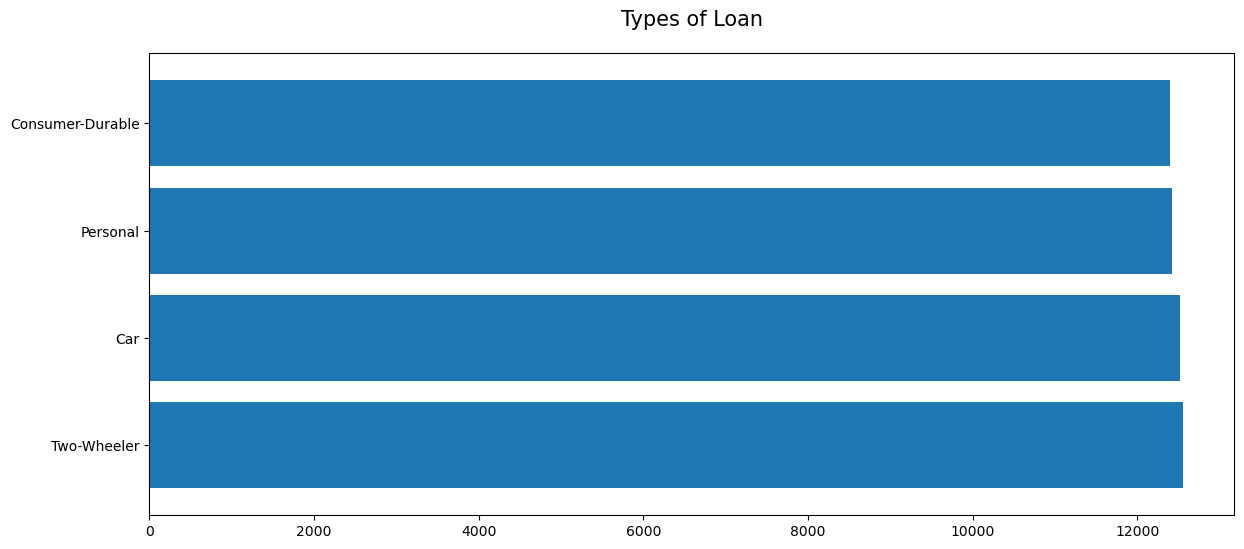

In [54]:
plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Types of Loan", fontdict={"fontsize":15}, pad =20)
plt.show()

In [55]:
import warnings

warnings.filterwarnings("ignore")


In [56]:
def Uni_Analysis_Num(dataframe, column):
    sns.set(style='ticks')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

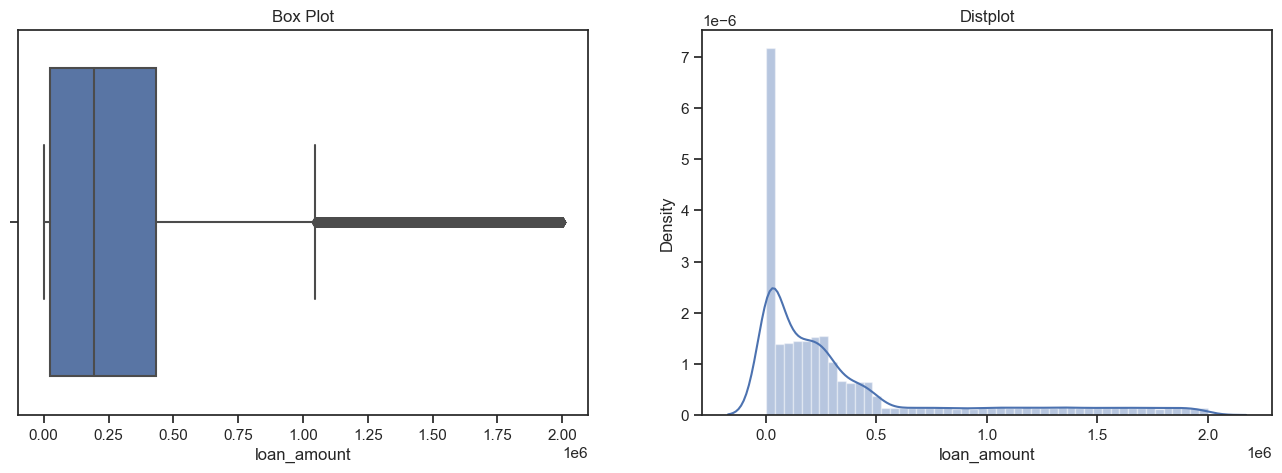

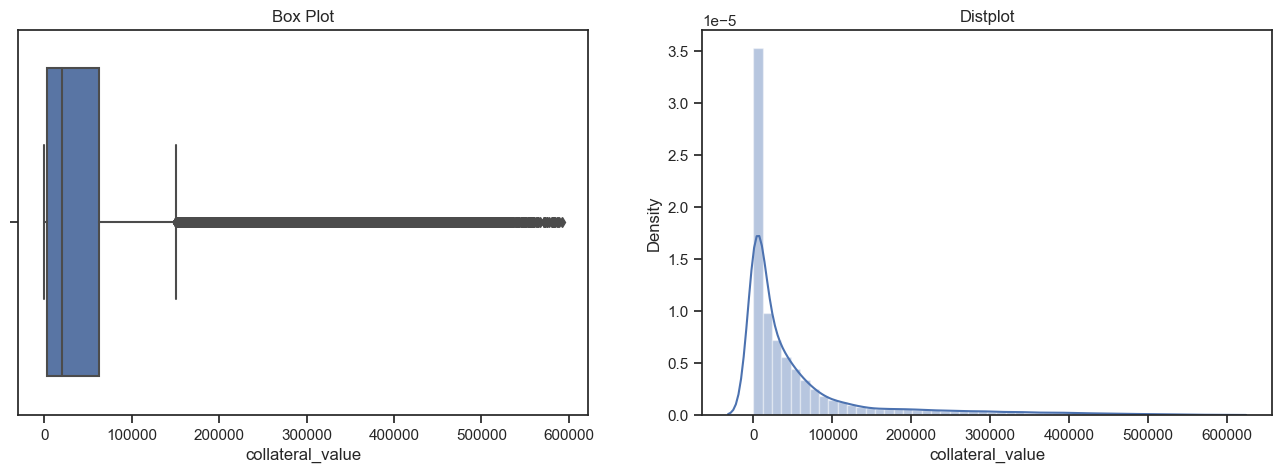

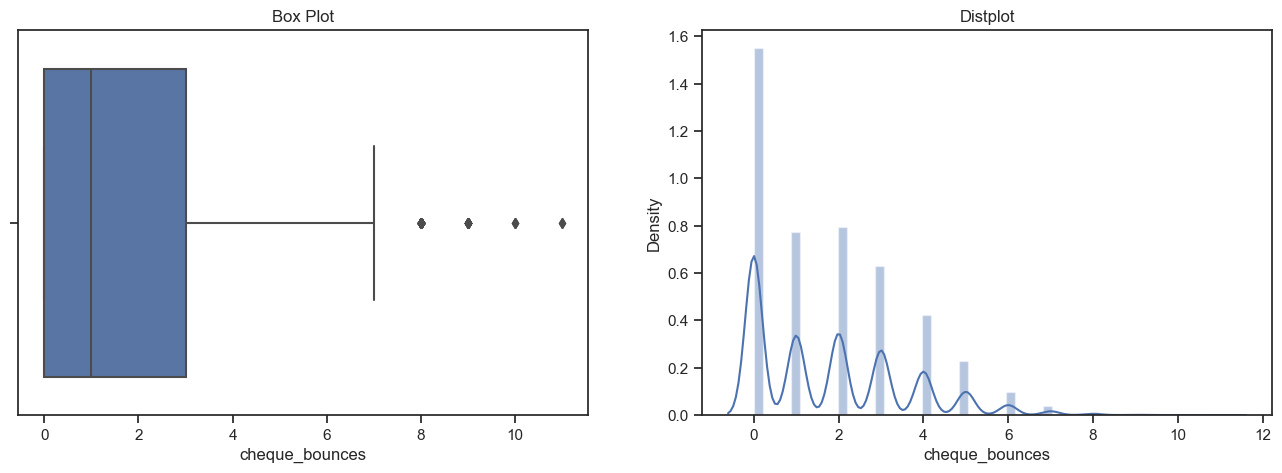

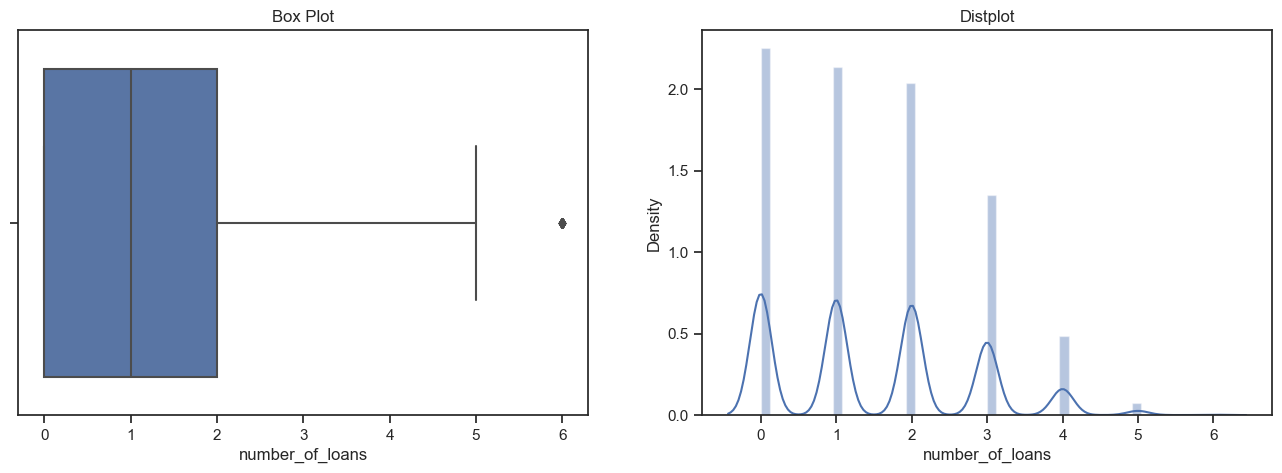

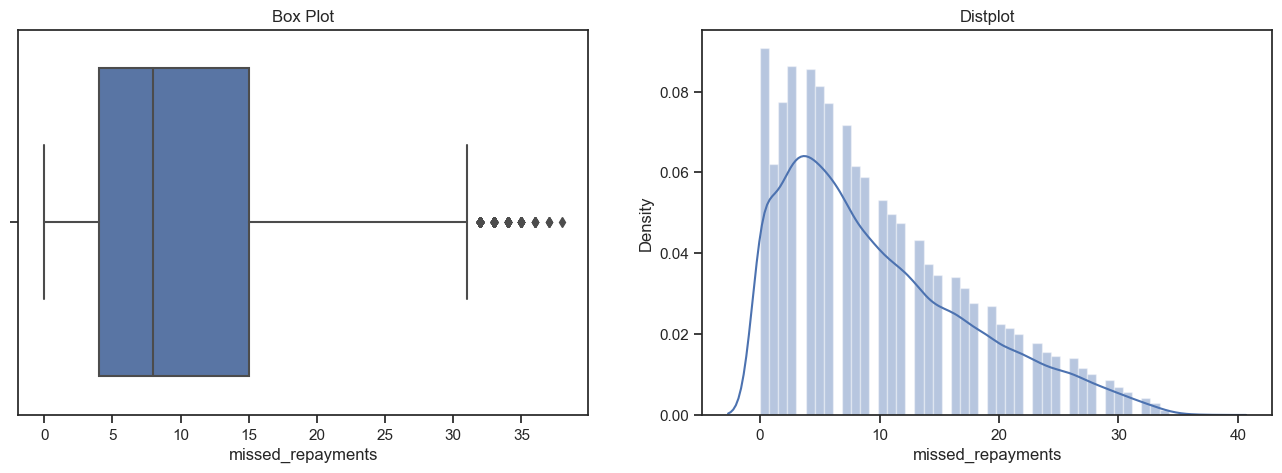

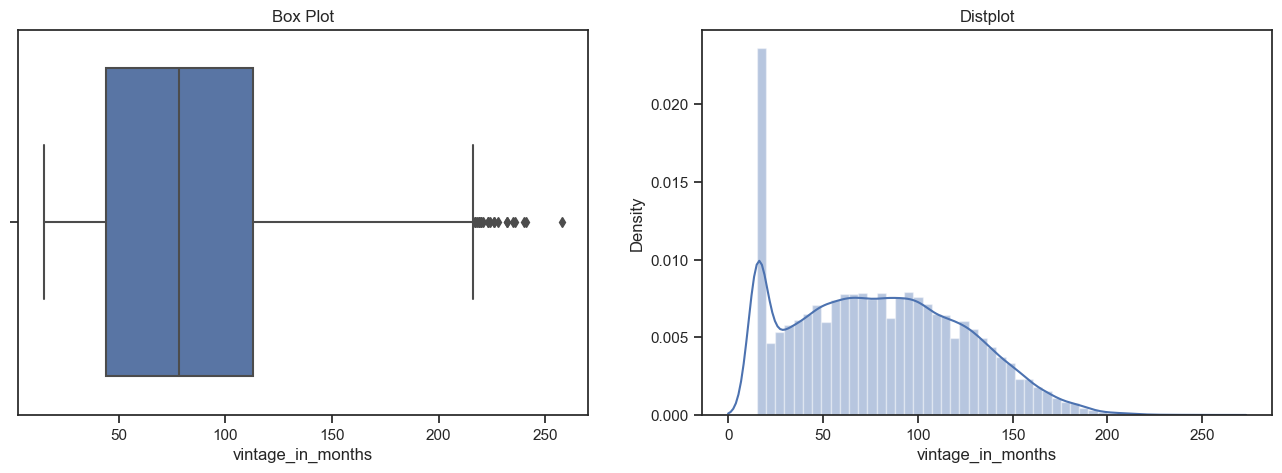

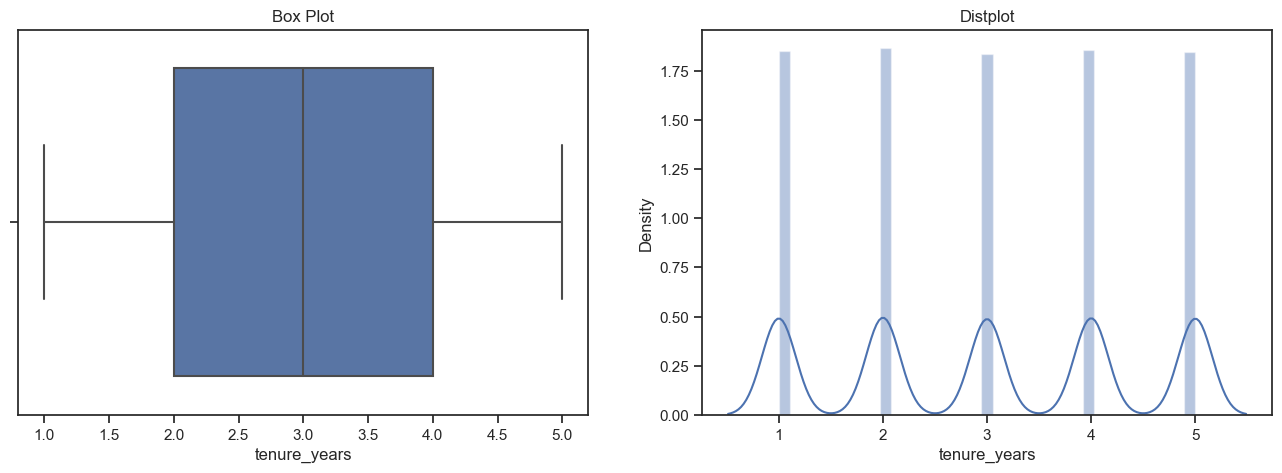

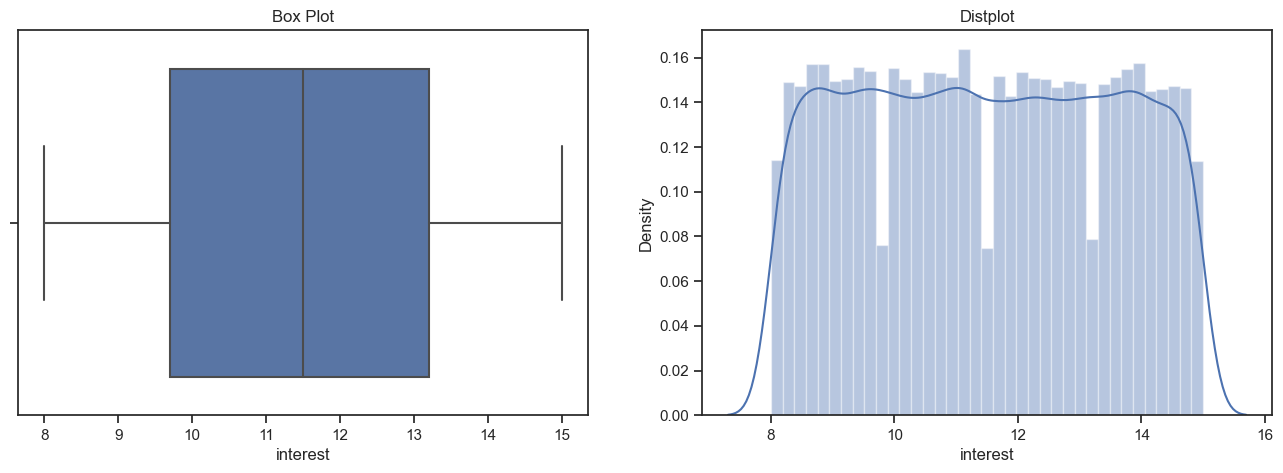

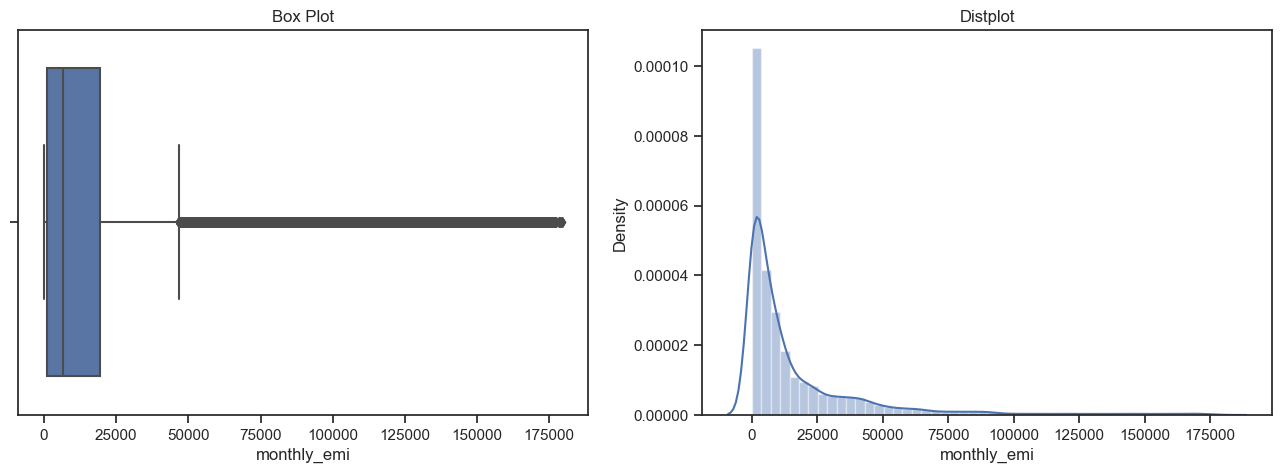

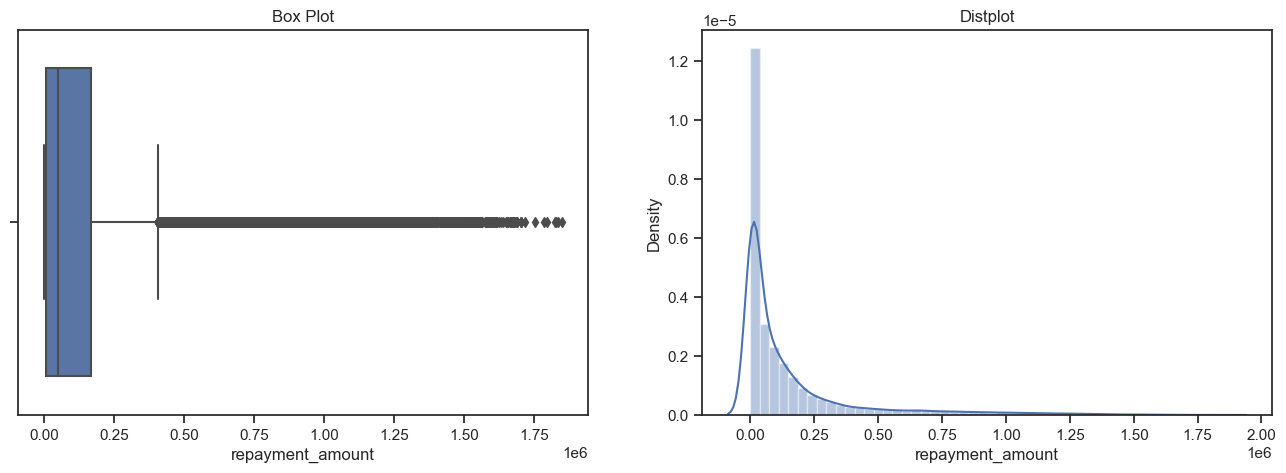

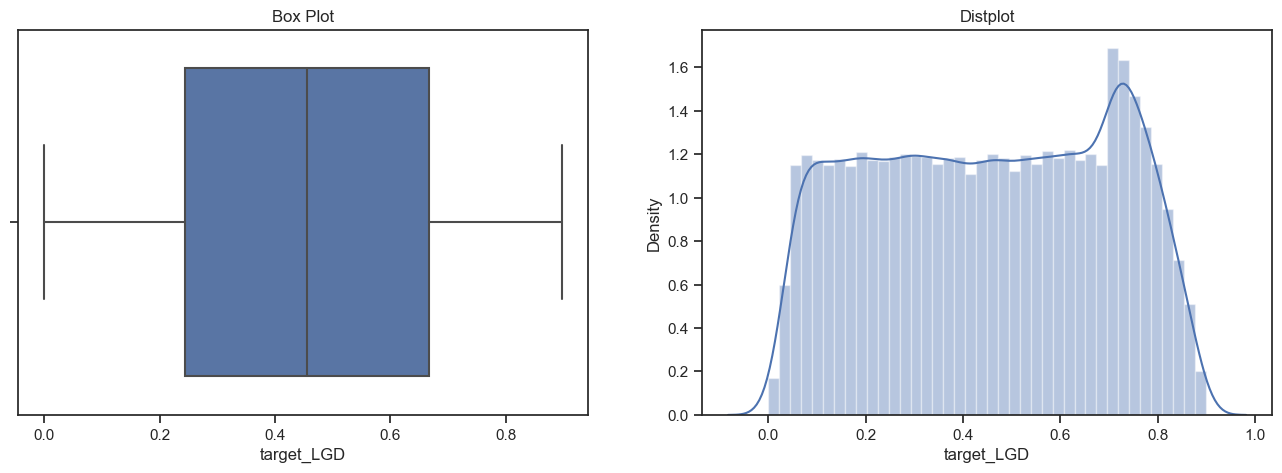

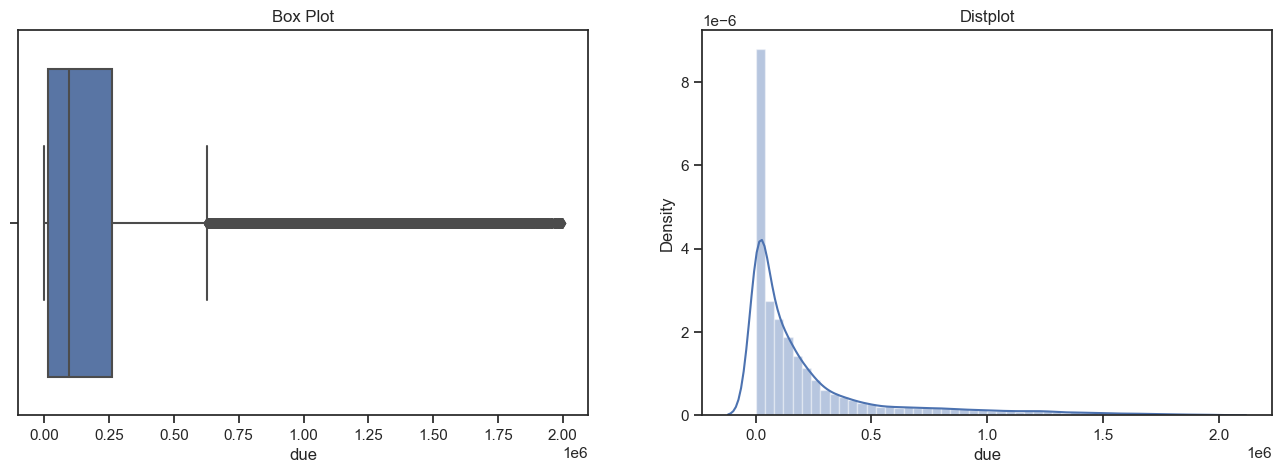

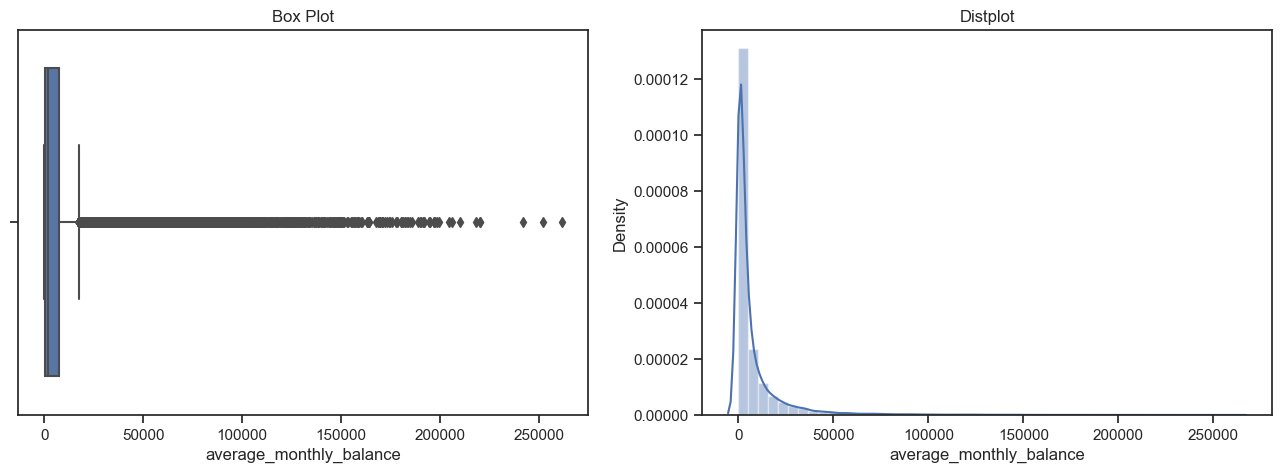

In [57]:
for i in numeric_data:
    Uni_Analysis_Num(data,i)

<AxesSubplot:xlabel='loan_amount', ylabel='repayment_amount'>

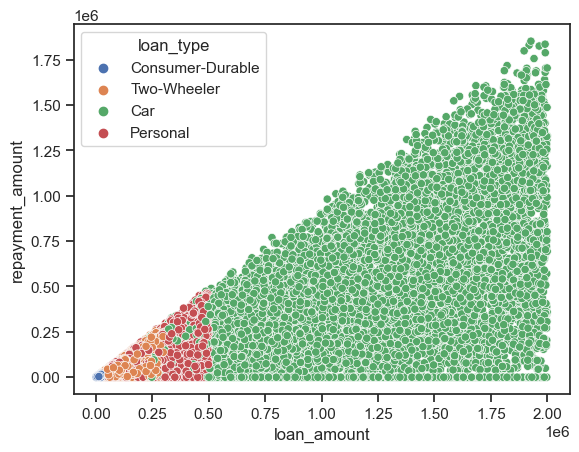

In [58]:
sns.scatterplot(x=data.loan_amount, y = data.repayment_amount, data=data, hue = 'loan_type',  palette="deep")


-The amount of car loan is much higher in comparision to others as per the scatter plot 

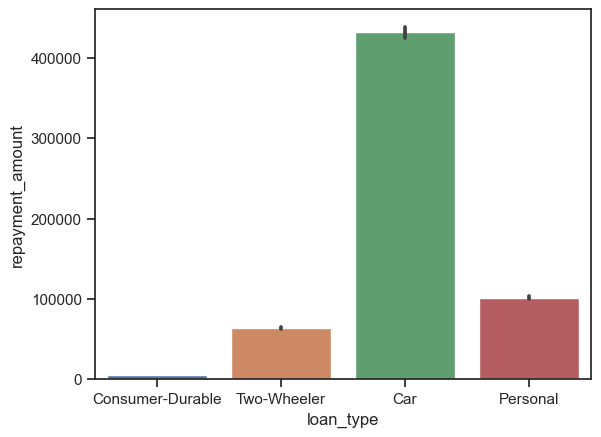

In [59]:
sns.set(style='ticks')
sns.barplot(x = data.loan_type,y = df.repayment_amount);

The repayment_amount for car loan is much higher in comparision to others 

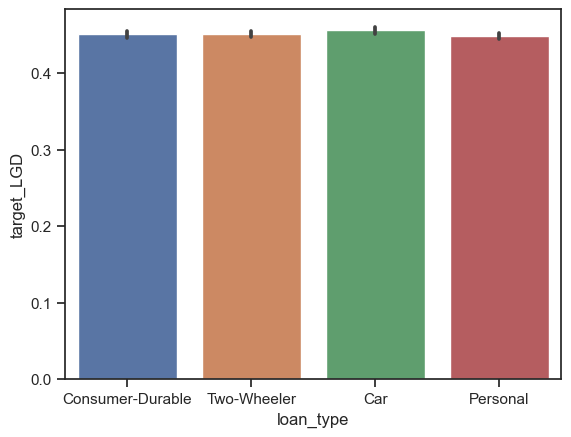

In [60]:
sns.barplot(x = data.loan_type,y = data.target_LGD)
plt.show()

In this graph target_LGD for car loan is higher in comparision to others

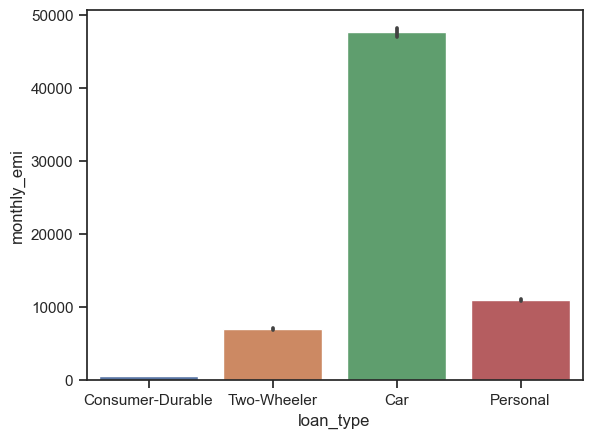

In [61]:
sns.barplot(x = data["loan_type"],y = data["monthly_emi"])
plt.show()

In this graph monthly_emi paid by customers is high for car loan

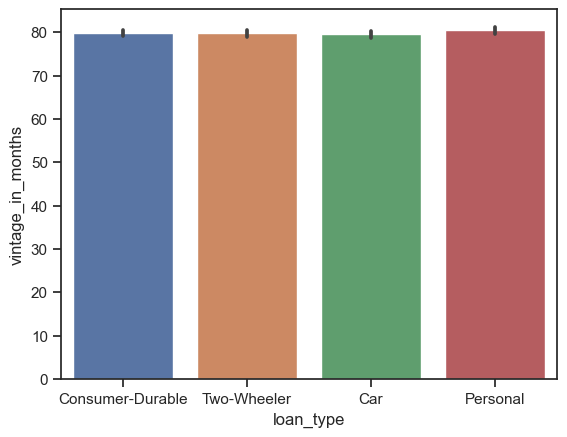

In [62]:
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

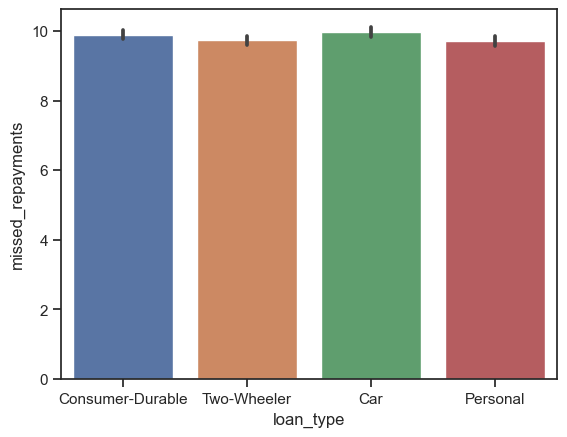

In [63]:
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

This graph is showing missed_repayments for car is higher than others.

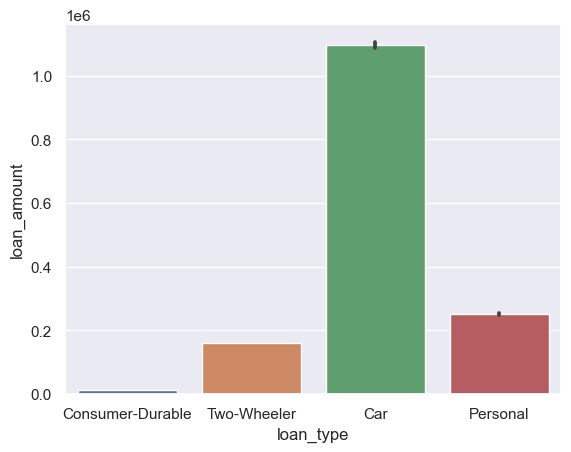

In [64]:
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

This graph is showing loan_amount is higher for car loan type

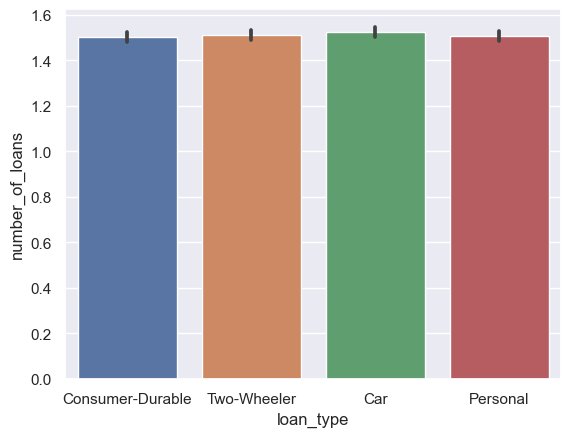

In [65]:
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

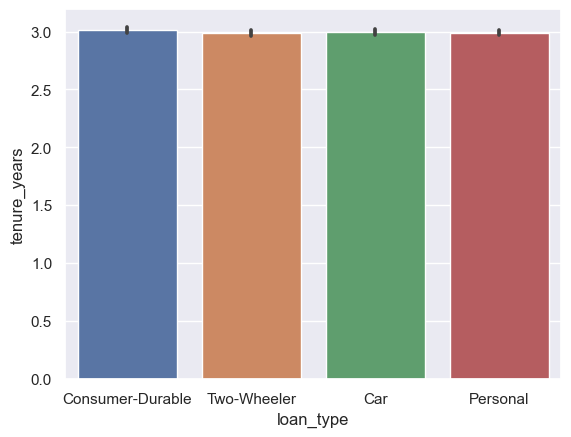

In [66]:
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

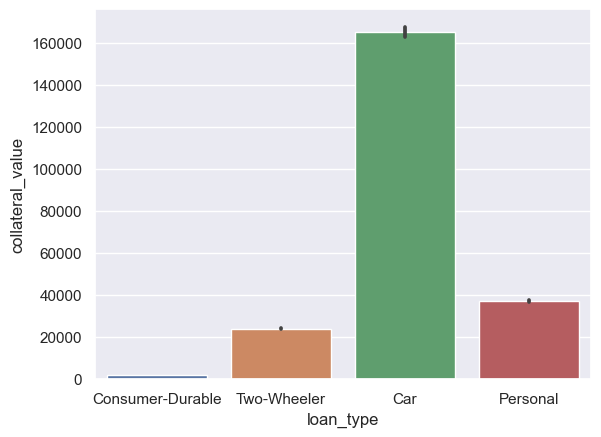

In [67]:
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

- Conclusion :- Repayment Amount or EMI amount of Car loan are way higher than other loan types 

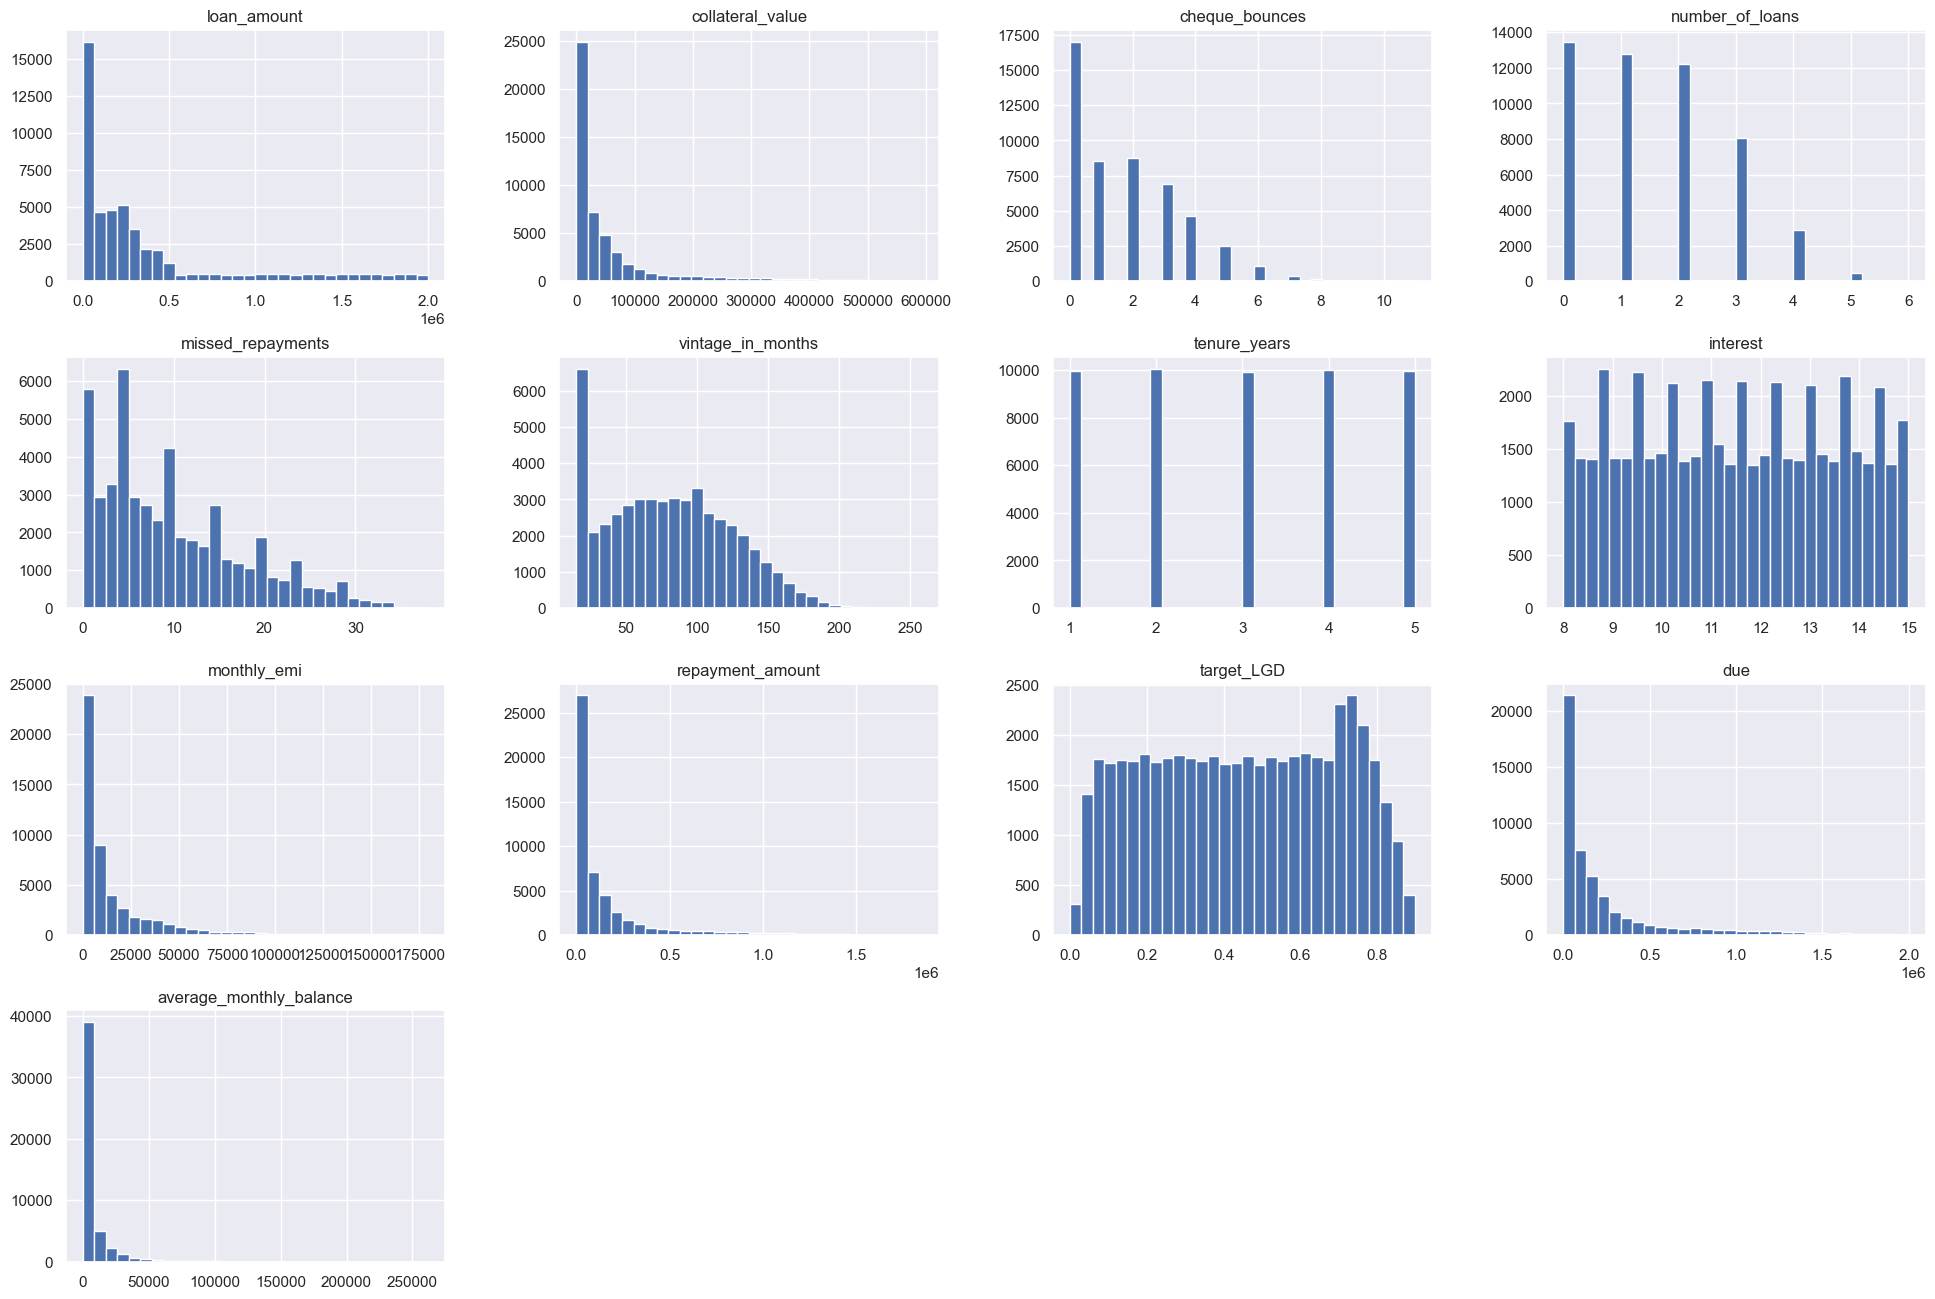

In [68]:
# Data Preparation: Variable Transformation, Feature Engineering

data[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()

- Created histograms for the numerical columns to gain insights into the distribution of data.

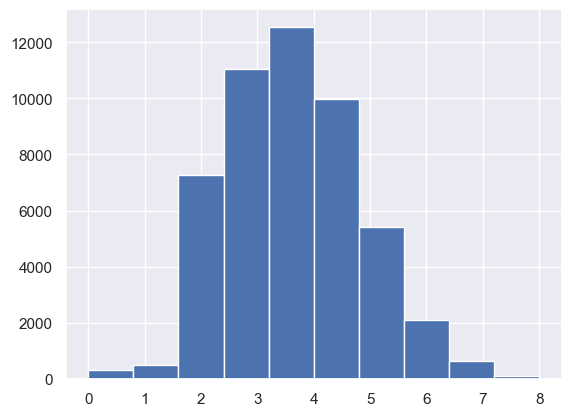

In [69]:
(data['average_monthly_balance']**(1/6)).hist();

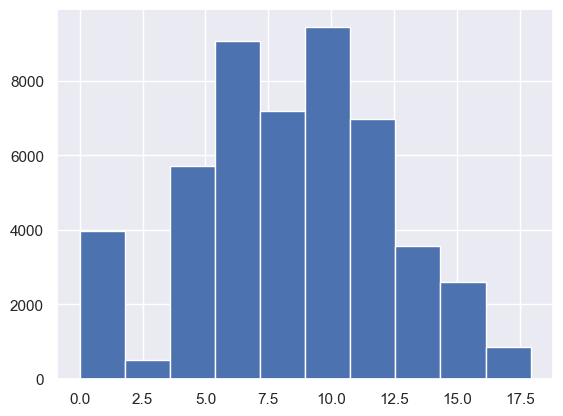

In [70]:
(data['repayment_amount']**(1/5)).hist();

In [71]:
data['loan_amount'] = data['loan_amount']**(1/5)

In [72]:
data['collateral_value'] = data['collateral_value']**(1/5)

In [73]:
data['cheque_bounces'] = data['cheque_bounces']**(1/2)

In [74]:
data['missed_repayments'] = data['missed_repayments']**(1/2)

In [75]:
data['vintage_in_months'] = data['vintage_in_months']**(1/2)

In [76]:
data['monthly_emi'] = data['monthly_emi']**(1/6)

In [77]:
data['repayment_amount'] = data['repayment_amount']**(1/5)

In [78]:
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [79]:
test_data['collateral_value'] = test_data['collateral_value']**(1/5)
test_data['cheque_bounces'] = test_data['cheque_bounces']**(1/2)
test_data['missed_repayments'] = test_data['missed_repayments']**(1/2)
test_data['vintage_in_months'] = test_data['vintage_in_months']**(1/2)
test_data['monthly_emi'] = test_data['monthly_emi']**(1/6)
test_data['repayment_amount'] = test_data['repayment_amount']**(1/5)
test_data['average_monthly_balance'] = test_data['average_monthly_balance']**(1/8)

In [80]:
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [81]:
curr_time = pd.to_datetime("now")

In [82]:
#deriving new feature using date column
data['difference'] = (curr_time-data['default_date'])/np.timedelta64(1,'D')

In [83]:
#deriving new feature using date column
test_data['difference'] = (curr_time-test_data['default_date'])/np.timedelta64(1,'D')

In [84]:
#dropping unnecessary columns for model building
data = data.drop(['disbursal_date', 'default_date', 'loan_acc_num', 'customer_name', 'customer_address'], axis=1)

In [85]:
#dropping unnecessary columns for model building
test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],axis=1)

In [86]:
#encoding
encoded = pd.get_dummies(data['loan_type'],drop_first=True)

In [87]:
#encoding
test_encoded = pd.get_dummies(test_data['loan_type'],drop_first=True)

In [88]:
data = data.drop(['loan_type'],axis=1)

In [89]:
test_data = test_data.drop(['loan_type'],axis=1)

In [90]:
data = pd.concat([data,encoded],axis=1)

In [91]:
test_data = pd.concat([test_data,test_encoded],axis=1)

<AxesSubplot:>

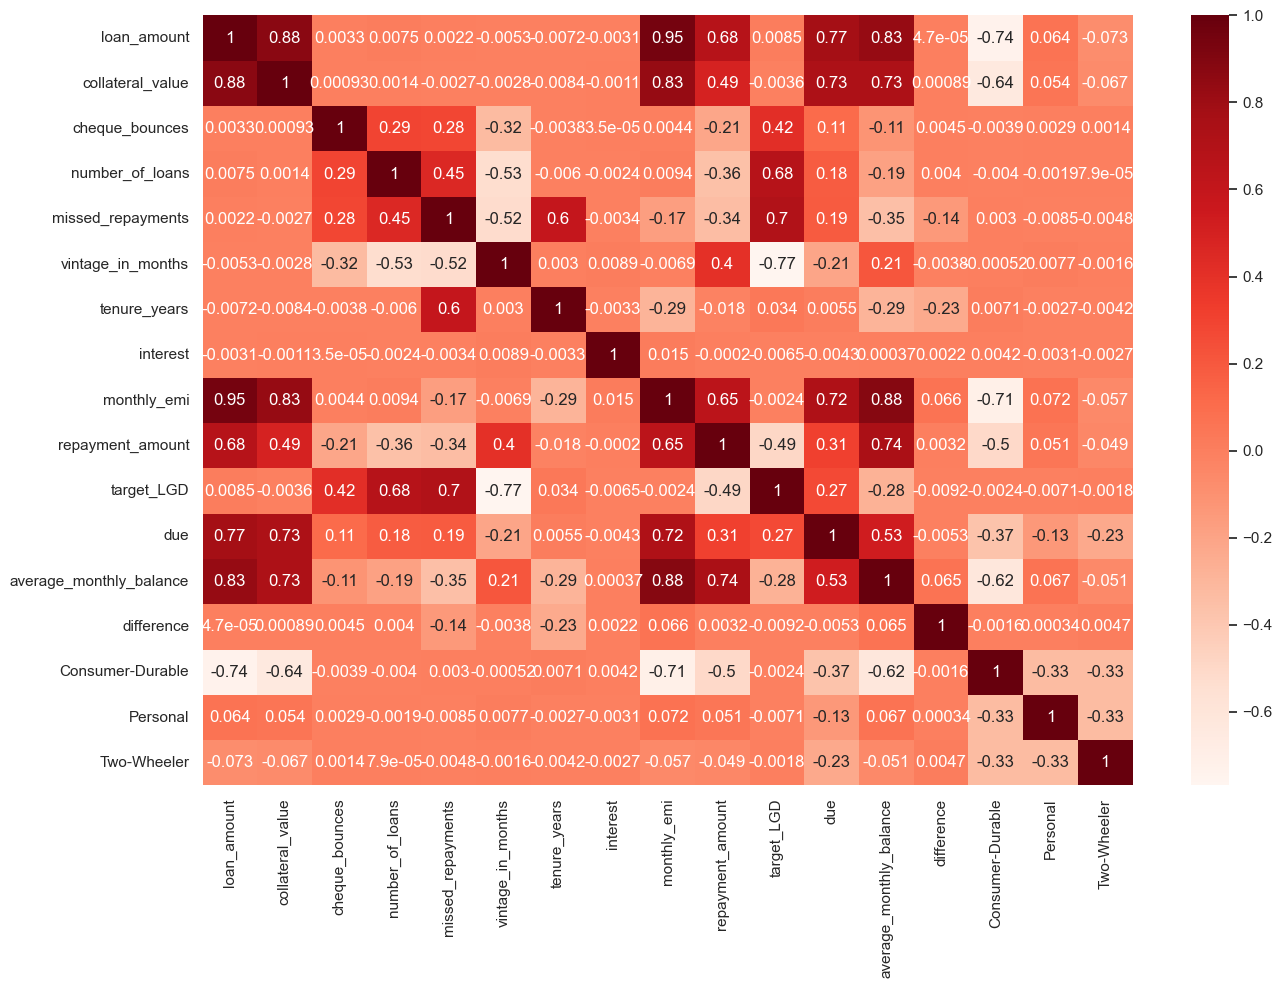

In [92]:
### For Correlation plot 
plt.figure(figsize = (15,10))

corr = data.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

- **High co-relation is seen among few variables**
- Observed a notable high correlation among certain variables through the use of a heatmap.

In [93]:
#Download the prepared dataset for PyCaret
import re

# Unintended escape sequence without raw string
pattern = re.compile("\d+")

# Using raw string
pattern = re.compile(r"\d+")
# Unicode escape sequence
my_string = "This is a Unicode character: \u03A9"

# Using raw string
my_string = r"This is a Unicode character: \u03A9"

In [94]:
data.to_csv(r"C:\Users\Pooja\OneDrive\Desktop\Case Study\pycaret.csv",index=False)

In [95]:
data.isnull().sum()

loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
repayment_amount           0
target_LGD                 0
due                        0
average_monthly_balance    0
difference                 0
Consumer-Durable           0
Personal                   0
Two-Wheeler                0
dtype: int64

In [96]:
#train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target_LGD'])
y = data [['target_LGD']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [97]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
## **Using Recusrive Feature Elimination**

In [99]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [100]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [101]:
from sklearn.linear_model import * 
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.8689028936040961

In [102]:
## **Using Multiple Linear Regression**

In [103]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.8693444349973711

In [104]:
## **Using Random Forest Regressor**

In [105]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [106]:
## Finding y_predict for test and train 

In [107]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7676349659888808


In [108]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.768911047914241


In [109]:
## **Using Gradient Boosting Regressor**

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 500,'max_depth': 4,'min_samples_split': 4,'learning_rate': 0.01,'loss': 'squared_error'}
# Change 'ls' to 'squared_error' for least squares regression
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

In [111]:
# Fit the model
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
# Print Coefficient of determination R^2
print("R squared: %.3f" % gbr.score(X_test, y_test))

R squared: 0.917


In [112]:
### Finding the R2 for predict valiable for test and train 

In [113]:
y_pred_train=gbr.predict(X_train)

# Print Coefficient of determination R^2
print("R_squared in train set: ",r2_score(y_train, y_pred_train))

R_squared in train set:  0.9207225040512084


In [114]:
y_pred_test=gbr.predict(X_test)

# Print Coefficient of determination R^2
print("R_squared in test set: ",r2_score(y_test, y_pred_test))

R_squared in test set:  0.9170548371740267


[0.00000000e+00 8.04186924e-03 6.59833812e-03 1.02540609e-01
 2.12790235e-01 5.20836162e-01 5.49862037e-02 0.00000000e+00
 1.67728142e-03 5.25012989e-02 3.96209227e-02 4.07079528e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


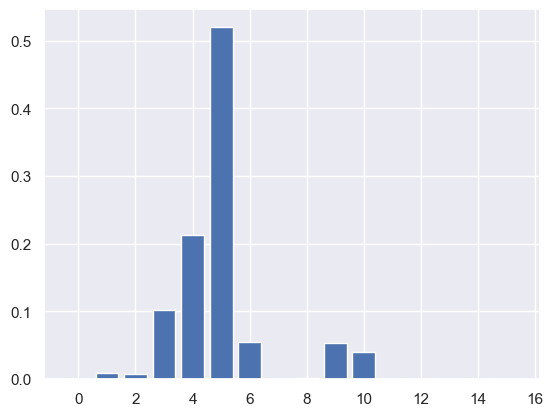

In [115]:
# plot feature importance
# feature importance
print(gbr.feature_importances_)
# plot
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

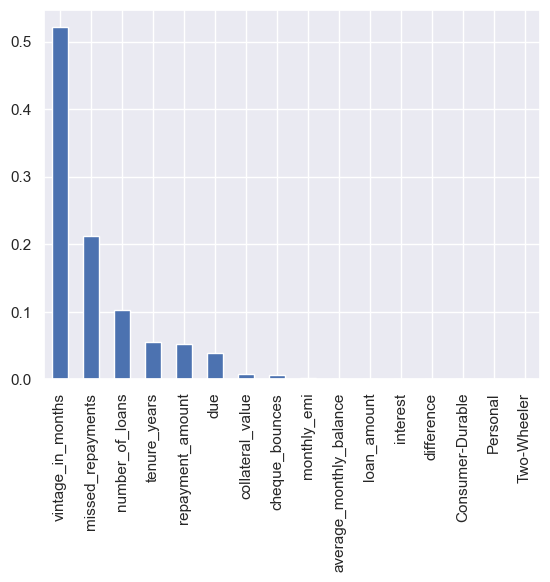

In [116]:
feat_importances = pd.Series(gbr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')

In [117]:
## **Pycaret**

In [118]:
dataset = pd.read_csv(r"C:\Users\Pooja\OneDrive\Desktop\Case Study\pycaret.csv")


In [119]:
dataset

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target_LGD,due,average_monthly_balance,difference,Consumer-Durable,Personal,Two-Wheeler
0,7.381630,5.477218,1.732051,0,1.732051,11.269428,2,10.1,3.168738,6.707064,0.155774,8343.42,2.892382,1306.51118,1,0,0
1,10.391759,6.341367,1.000000,0,0.000000,12.489996,2,11.8,4.225647,9.923717,0.121187,24940.39,4.412614,2768.51118,0,0,1
2,13.724996,10.304553,0.000000,1,3.162278,4.690416,3,14.6,5.060187,9.417694,0.609336,412952.27,4.454530,3237.51118,0,0,0
3,8.778276,6.348223,2.236068,2,3.000000,5.477226,2,9.6,3.657956,0.000000,0.802205,52125.00,2.833998,1993.51118,0,0,1
4,6.127065,4.021066,0.000000,1,1.732051,7.874008,2,9.6,2.710866,5.369277,0.361464,4172.49,2.620310,2929.51118,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49884,11.734359,8.450291,1.414214,2,2.828427,6.480741,2,9.6,4.658867,7.895155,0.668449,191806.68,4.065041,764.51118,0,0,1
49885,10.079738,6.131534,2.449490,2,3.000000,9.273618,3,12.6,3.893905,8.258742,0.547456,65629.93,3.383896,3614.51118,0,0,1
49886,8.766184,5.279381,1.000000,0,2.000000,12.489996,2,14.0,3.680457,8.477421,0.074979,7982.66,3.778589,2578.51118,0,0,1
49887,9.512024,6.389877,0.000000,0,2.236068,9.165151,2,14.9,3.945423,8.784352,0.191483,25563.34,4.009074,3436.51118,0,0,1


In [120]:
data= dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [121]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (39911, 17)
Unseen Data For Predictions: (9978, 17)


In [122]:
!pip install pycaret

In [123]:
#import pycaret package
import pycaret


In [124]:
from pycaret.regression import *


In [125]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
from catboost import CatBoostClassifier  

In [127]:
exp_reg101 = setup(data = data, target = 'target_LGD', session_id=123) 

,Description,Value
0,Session id,123
1,Target,target_LGD
2,Target type,Regression
3,Original data shape,"(39911, 17)"
4,Transformed data shape,"(39911, 17)"
5,Transformed train set shape,"(27937, 17)"
6,Transformed test set shape,"(11974, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [128]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0137,0.0003,0.0180,0.9944,0.0130,0.0949,3.9420
xgboost,Extreme Gradient Boosting,0.0229,0.0009,0.0302,0.9843,0.0216,0.1063,0.2270
lightgbm,Light Gradient Boosting Machine,0.0318,0.0017,0.0413,0.9705,0.0297,0.1826,0.2110
rf,Random Forest Regressor,0.0453,0.0037,0.0608,0.9363,0.0445,0.2794,6.9960
gbr,Gradient Boosting Regressor,0.0502,0.0042,0.0648,0.9276,0.0466,0.2934,2.9500
et,Extra Trees Regressor,0.0535,0.0050,0.0708,0.9137,0.0518,0.3250,3.6040
ridge,Ridge Regression,0.0682,0.0076,0.0871,0.8692,0.0616,0.4737,0.0310
lr,Linear Regression,0.0682,0.0076,0.0871,0.8691,0.0616,0.4740,1.1180
br,Bayesian Ridge,0.0682,0.0076,0.0871,0.8691,0.0616,0.4742,0.0340
dt,Decision Tree Regressor,0.0667,0.0082,0.0908,0.8579,0.0661,0.3522,0.1670


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [129]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0138,0.0003,0.0180,0.9943,0.0128,0.1531
1,0.0137,0.0003,0.0180,0.9945,0.0130,0.0674
2,0.0136,0.0003,0.0179,0.9945,0.0129,0.0528
3,0.0137,0.0003,0.0182,0.9943,0.0131,0.0547
4,0.0132,0.0003,0.0175,0.9946,0.0126,0.0520
5,0.0136,0.0003,0.0183,0.9944,0.0132,0.0574
6,0.0140,0.0004,0.0188,0.9939,0.0136,0.0595
7,0.0138,0.0003,0.0182,0.9943,0.0131,0.3031
8,0.0132,0.0003,0.0174,0.9947,0.0126,0.0597


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [130]:
tuned_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0130,0.0003,0.0169,0.9950,0.0120,0.1267
1,0.0137,0.0003,0.0185,0.9942,0.0132,0.0672
2,0.0134,0.0003,0.0177,0.9946,0.0128,0.0535
3,0.0141,0.0003,0.0185,0.9941,0.0133,0.0588
4,0.0134,0.0003,0.0177,0.9945,0.0127,0.0548
5,0.0134,0.0003,0.0179,0.9947,0.0130,0.0580
6,0.0134,0.0003,0.0181,0.9943,0.0131,0.0572
7,0.0133,0.0003,0.0174,0.9949,0.0126,0.0905
8,0.0130,0.0003,0.0171,0.9949,0.0124,0.0576


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [131]:
#Fitting 10 folds for each of 10 candidates, totalling 100 fits

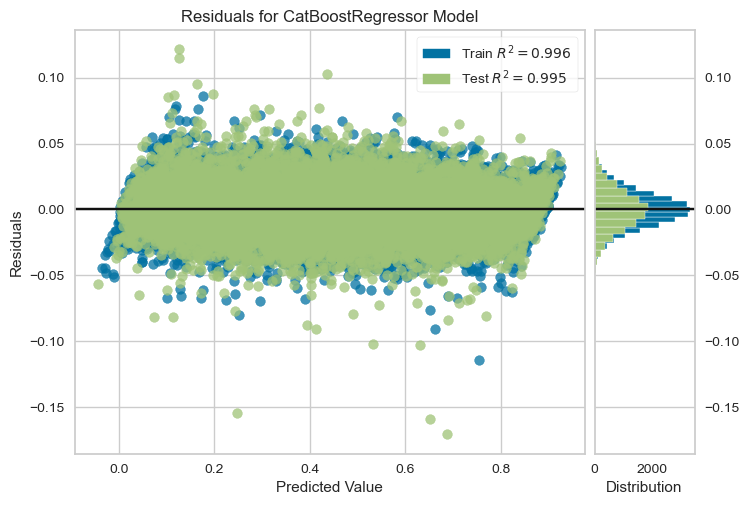

In [132]:
plot_model(tuned_cat)

- The test and train value of R2 is same 

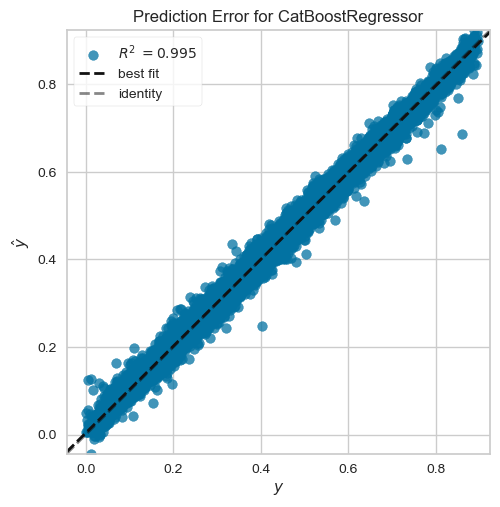

In [133]:
plot_model(tuned_cat, plot = 'error')

#The value of r2 is revolving aroud the best fit line

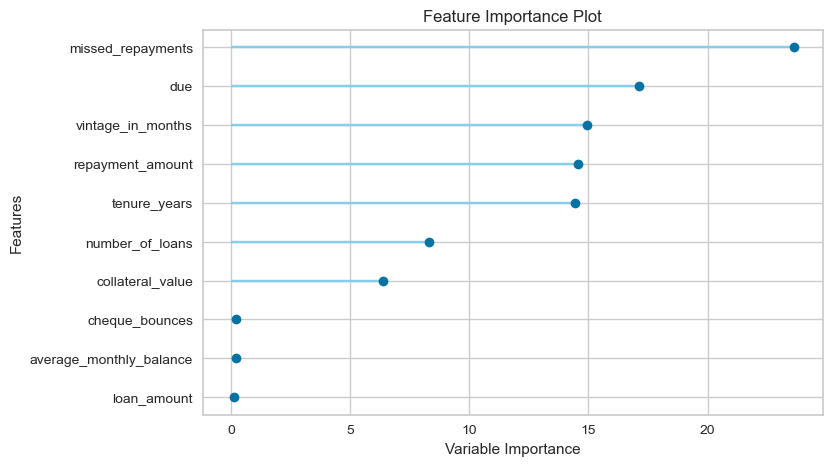

In [134]:
plot_model(tuned_cat, plot='feature')

So, the highly important features are
1. missed_repayments
2. due
3. vintage_in_months
4. repayment_amount 
5. tenure_years

In [135]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [136]:
predict_model(tuned_cat);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0131,0.0003,0.0174,0.9947,0.0125,0.0612


In [137]:
final_cat = finalize_model(tuned_cat)

In [138]:
predict_model(final_cat);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0109,0.0002,0.0142,0.9965,0.0101,0.0507


In [139]:
unseen_predictions = predict_model(final_cat, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0112,0.0002,0.0146,0.9963,0.0106,0.0579


,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,due,average_monthly_balance,difference,Consumer-Durable,Personal,Two-Wheeler,target_LGD,prediction_label
0,14.568925,6.185971,1.414214,3,0.000000,7.810250,1,9.6,6.214138,11.815962,426025.718750,5.287674,3047.511230,0,0,0,0.635279,0.597321
1,17.860989,13.309298,1.732051,1,2.000000,10.099504,3,11.5,6.255868,16.553556,574763.437500,5.186107,3234.511230,0,0,0,0.086454,0.102323
2,7.285809,4.045664,1.414214,0,3.000000,9.219544,5,13.2,2.787603,6.774142,6265.009766,2.165705,-166.488815,1,0,0,0.252373,0.233952
3,10.504994,7.864090,1.000000,3,4.795832,5.477226,5,12.0,3.764439,6.770711,113703.101562,3.176598,43.511181,0,0,1,0.653672,0.657887
4,7.558163,5.450387,1.000000,0,3.741657,10.862781,3,11.2,3.053045,5.907742,17468.730469,2.786364,2370.511230,1,0,0,0.513230,0.515198


In [140]:
save_model(final_cat,'Final Catboost Model BFSI')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['loan_amount', 'collateral_value',
                                              'cheque_bounces',
                                              'number_of_loans',
                                              'missed_repayments',
                                              'vintage_in_months',
                                              'tenure_years', 'interest',
                                              'monthly_emi', 'repayment_amount',
                                              'due', 'average_monthly_balance',
                                              'difference', 'Consumer-Durable',
                                              'Personal', 'Two-Wheeler'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                              

In [141]:
saved_final_lightgbm = load_model('Final Catboost Model BFSI')

Transformation Pipeline and Model Successfully Loaded


In [142]:
### **Further Experiments**

In [143]:
### **Using XGBoost Regressor**

In [144]:
pip install xgboost

In [145]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [146]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.985 (0.001)


In [147]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.979 (0.001)


In [148]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [149]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9200760393803706
test score:  0.9168878577949404


In [150]:
## **Using Adaboost Regressor**

In [151]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.8496794491594524
test score:  0.8507239022256795


In [152]:
## **Using ElasticNet : Hybrid Regularized Model**

In [153]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [154]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [155]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train,y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.87, MSE:0.01, RMSE:0.09
Alpha:0.0010, R2:0.87, MSE:0.01, RMSE:0.09
Alpha:0.0100, R2:0.85, MSE:0.01, RMSE:0.09
Alpha:0.1000, R2:0.70, MSE:0.02, RMSE:0.13
Alpha:0.3000, R2:0.19, MSE:0.05, RMSE:0.22
Alpha:0.5000, R2:0.00, MSE:0.06, RMSE:0.24
Alpha:0.7000, R2:0.00, MSE:0.06, RMSE:0.24
Alpha:1.0000, R2:0.00, MSE:0.06, RMSE:0.24


In [156]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.869, MSE:0.01, RMSE:0.09


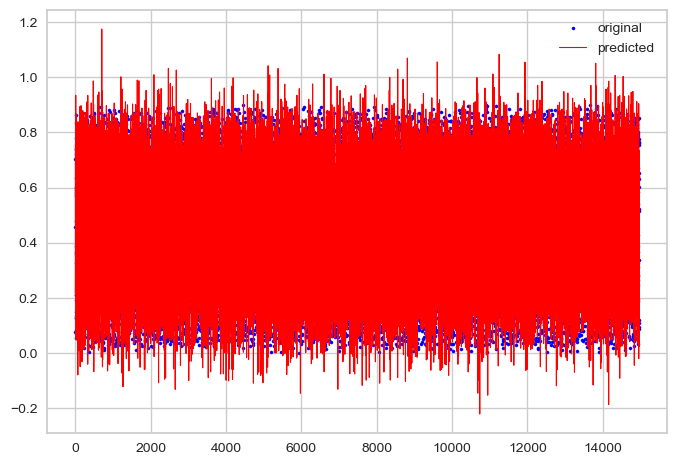

In [157]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [158]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

Alpha:  0.0001
Intercept:  0.45197489360236276


In [159]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.869, MSE:0.01, RMSE:0.09


In [160]:
## **Using LightGBM**

In [161]:
plt.style.use('ggplot')
import lightgbm as ltb

In [162]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2134
[LightGBM] [Info] Number of data points in the train set: 34922, number of used features: 16
[LightGBM] [Info] Start training from score 0.451975

LGBMRegressor()


In [163]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.9713591931430302


In [164]:
## **Model Evaluation: Hyperparameter Tuning**

In [165]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}


In [166]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9976239122976731
test score:  0.9958091672633899


In [167]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9976239122976731
test score:  0.9958091672633899


In [168]:
## Unseen data 

In [169]:
#**Prediction on Unseen Data**

In [170]:
data = pd.DataFrame(data)
columns = df.columns
print(columns)

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'repayment_amount',
       'target_LGD', 'due'],
      dtype='object')


In [171]:
test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due', 'average_monthly_balance',
       'difference', 'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [172]:
test_data = sc.fit_transform(test_data)

In [173]:
test_data = pd.DataFrame(test_data)

In [174]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [175]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [176]:
test_data = pd.DataFrame(test_data)

In [177]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [178]:
submission_df.sample(10)

,id,LGD
9567,LN79314476,0.198455
509,LN29607396,0.065699
2666,LN58336031,0.626492
7933,LN63861516,0.791782
2173,LN75928651,0.419131
2351,LN39906930,0.452528
5509,LN71190131,0.037972
5200,LN15592368,-0.004038
5891,LN64075392,0.794392
1316,LN84250178,0.499986


In [179]:
submission_df.to_csv("Desktop.csv",index=False)

 - Among the models, XGBoost Regressor stood out with exceptional performance, achieving an impressive R Squared value of 99.5% on the test data.

 - Loan Demand and Prevalence: Two-wheeler loans have a higher demand or prevalence compared to other categories in the dataset. This indicates a potential market trend or customer preference towards acquiring two-wheeler vehicles.

 - Loan Amounts: Despite the higher number of loans for two-wheeler vehicles, car loans have the highest loan amounts among all vehicle types. This suggests that customers seeking car loans are willing to borrow larger amounts, possibly due to the higher value of cars compared to two-wheelers.

 - Monthly EMI: Car loans have significantly higher monthly Equated Monthly Installments (EMIs) compared to other types of loans. This could be attributed to the larger loan amounts associated with car loans and potentially longer repayment tenures.

 - Distribution of Data: Histograms for numerical columns were created to gain insights into the distribution of data. This helps in understanding the spread and central tendencies of different variables, which is crucial for further analysis and modeling.

 - Correlation Among Variables: A heatmap was used to observe notable high correlations among certain variables. Understanding these correlations helps in identifying potential relationships and dependencies between different factors.

 - Model Building and Evaluation: Multiple predictive models, including Multiple Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, Adaboost Regressor, and ElasticNet, were constructed. Among these models, the XGBoost Regressor stood out with exceptional performance, achieving a high R-squared value of 99.5% on the test data.



- It is recommended to prioritize our attention on Car and Two-Wheeler loan types. These loan categories appear to have significant relevance and impact on operations.

- It is crucial to pay special attention to customers with missed repayments, especially those with high repayment amounts. 

- Customers due factors and tenure emerges as a significant subset influencing the prediction of Loss Given Default (LGD)